# Intro to Tensors


In [2]:
import torch
import matplotlib.pyplot as plt 
import matplotlib.ticker as ticker
import math
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

**TENSORS**
- tensors are essentially matrices
- usually, you can only perform mathematical operations on tensors that have the same dimensions
- **torch.tensor(x)** creates a copy of the data **x**.

In [4]:
zeros = torch.zeros(2, 3)
ones = torch.ones(3, 2)
tensor = torch.tensor([[1, 2, 3], [4, 5, 6]])

print(zeros)
print(ones)
print(tensor)

sum = zeros + tensor
print(sum)

# product = ones*zeros # will return a runtime error

tensor([[0., 0., 0.],
        [0., 0., 0.]])
tensor([[1., 1.],
        [1., 1.],
        [1., 1.]])
tensor([[1, 2, 3],
        [4, 5, 6]])
tensor([[1., 2., 3.],
        [4., 5., 6.]])


**TORCH EMPTY**
- **torch.empty(x, y)** allocates memory for an **x row** by **y column** tensor but does not clear the memory. Hence, the values that you may see are from previous tasks.
- there are also **torch.zeros()**, **torch.ones()**, and **torch.rand()**


In [3]:
a = torch.empty(3, 4)
b = torch.zeros(3, 4)
c = torch.ones(3, 4)
d = torch.rand(3, 4)
a
print(type(a))
print(a)
print(b)
print(c)
print(d)


<class 'torch.Tensor'>
tensor([[8.4273e-07, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [1.7611e+19, 2.7556e+23, 2.9957e+12, 7.5338e+28],
        [3.8991e+21, 4.4650e+30, 0.0000e+00, 0.0000e+00]])
tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])
tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])
tensor([[0.7002, 0.2970, 0.6860, 0.2944],
        [0.8611, 0.3266, 0.8497, 0.0808],
        [0.8422, 0.5697, 0.7807, 0.4104]])


**MANUAL SEED**
- **torch.manual_seed(x)** allows you to manually select a seed for the random number generator 
- the seed determines what values the random number generator will return
- by manually selecting a seed, this guarantees that the generator returns the same "random" values every run (try running the following code several times)

In [31]:
torch.manual_seed(1729)
random = torch.rand(2, 3)

print(random)

tensor([[0.3126, 0.3791, 0.3087],
        [0.0736, 0.4216, 0.0691]])


**EMPTY LIKE**
- **torch.empty_like(x)** creates an empty tensor that has the same dimensions as ** tensor x** 
- there are also **torch.zeros_like()**, **torch.ones_like**, and ***torch.rand_like()** 

In [35]:
a = torch.empty(3, 3)

empty_like_x = torch.empty_like(a)

print(a.shape) #print the dimensions of the tensor
print(empty_like_x.shape)



torch.Size([3, 3])
torch.Size([3, 3])


**TENSOR BROADCASTING**
- Broadcasting allows us to perform TENSOR operations on tensors with different dimensions
- Broadcasting does not allow us to perform typical matrix operations on tensors of differing dimensions

**TENSOR BROADCASTING RULES**
- Tensors cannot be empty and they must have dimensions
- When comparing the tensor's dimensions, starting from the last dimension to the first dimension:
>- Each dimension must be equal, or 
>- One of the dimensions must be of size 1, or
>- One of the dimension does not exist in one of the tensors

In [ ]:
a  =    torch.ones(4, 3, 2)
b = a * torch.rand(   3, 2) # 3rd and 2nd dimensions (dims) are identical, 1st dim does not exist, and so it obeys broadcasting rules
print(b)

c = a * torch.rand(   3, 1) # 3rd dim has size of 1, 2nd dim is identical, and 1st dim does not exist, and so it obeys broadcasting rules
print(c)

rand = torch.rand(2, 4)
doubled = rand * torch.ones(1, 4) * 2 # Each row of rand is being operated on by the one row of torch.ones(1, 4), see how they have the same column dimension?
print(rand)
print(doubled)

**OPERATING ON TENSORS**
- using **add_()** allows us to effectively change the tensor without having to state "tensor = tensor + 1", similar to the **++i** operation
- There are "_()" versions for most mathematical operations

In [47]:
a = torch.ones((2, 2), dtype= torch.int16)

print('\nBefore addition:')
print(a)
print('\nAfter addition:')
print(a.add_(1))


Before addition:
tensor([[1, 1],
        [1, 1]], dtype=torch.int16)

After addition:
tensor([[2, 2],
        [2, 2]], dtype=torch.int16)


**THE out ARGUMENT**
- **out=x** can also be used to directly rewrite **tensor x**, if the output has the same dimensions as **tensor x**, without having to reallocate more memory 

In [55]:
a = torch.ones(2 ,2)
b = torch.ones(2, 2) * 3
c = torch.zeros(2, 2)
old_id = id(c)

d = torch.add(a, b, out=c)
print(c)

assert c is d
assert id(c), old_id # only throws an assertion error if their ids do not match

tensor([[4., 4.],
        [4., 4.]])


**COPY/CLONE TENSORS**
- In Python, setting **b = a** means **b** only references **Var a**. **Var b** does not actually contain the data found in **Var a**. Altering **Var a** will also alter **Var b**
- If you want to work on a separate copy, use the **clone()** method
- The **clone()** method will create a copy of the original but also will copy the settings for autograd from the original
- You can use <mark style="background-color:grey;">detach()</mark> method to specify that the clone is to have autograd disabled.

In [61]:
a = torch.ones(2, 2)
b = a
# a[0][0] = 5
print(a)
print(b) # since b only tells you about a, it will also display the current values of tensor a

aa = torch.ones((2, 2), requires_grad=True)
b = aa.clone()
c = aa.detach().clone()

print(aa)
print(b)
print(c)

tensor([[1., 1.],
        [1., 1.]])
tensor([[1., 1.],
        [1., 1.]])
tensor([[1., 1.],
        [1., 1.]], requires_grad=True)
tensor([[1., 1.],
        [1., 1.]], grad_fn=<CloneBackward0>)
tensor([[1., 1.],
        [1., 1.]])


**CHOOSING YOUR DEVICE**

In [63]:
if torch.cuda.is_available():
    print('We have a GPU')
else: 
    print('Sorry, CPU only')

Sorry, CPU only


# Autograd

Used for computing the gradients/derivatives. A matrix of 1st degree derivatives is called a Jacobian. A matrix of 2nd degree derivatives is called a Hessian.

In [2]:
%matplotlib inline

In [6]:
a = torch.linspace(0, 2 * math.pi, steps=25, requires_grad=True)
print(a)

tensor([0.0000, 0.2618, 0.5236, 0.7854, 1.0472, 1.3090, 1.5708, 1.8326, 2.0944,
        2.3562, 2.6180, 2.8798, 3.1416, 3.4034, 3.6652, 3.9270, 4.1888, 4.4506,
        4.7124, 4.9742, 5.2360, 5.4978, 5.7596, 6.0214, 6.2832],
       requires_grad=True)


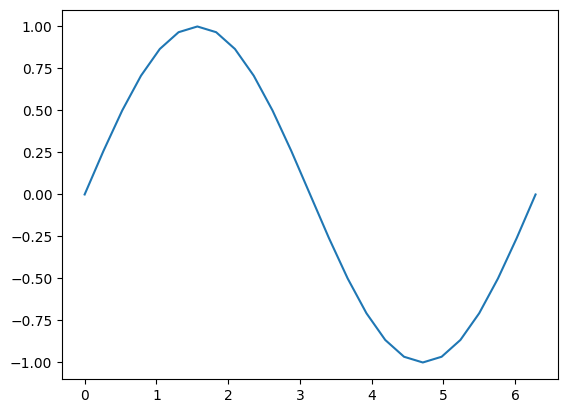

In [18]:
b = torch.sin(a)
plt.plot(a.detach(), b.detach())
plt.show()

In [13]:
print(b)

tensor([ 0.0000e+00,  2.5882e-01,  5.0000e-01,  7.0711e-01,  8.6603e-01,
         9.6593e-01,  1.0000e+00,  9.6593e-01,  8.6603e-01,  7.0711e-01,
         5.0000e-01,  2.5882e-01, -8.7423e-08, -2.5882e-01, -5.0000e-01,
        -7.0711e-01, -8.6603e-01, -9.6593e-01, -1.0000e+00, -9.6593e-01,
        -8.6603e-01, -7.0711e-01, -5.0000e-01, -2.5882e-01,  1.7485e-07],
       grad_fn=<SinBackward0>)


In [14]:
c = 2 * b
print(c)

d = c + 1
print(d)

tensor([ 0.0000e+00,  5.1764e-01,  1.0000e+00,  1.4142e+00,  1.7321e+00,
         1.9319e+00,  2.0000e+00,  1.9319e+00,  1.7321e+00,  1.4142e+00,
         1.0000e+00,  5.1764e-01, -1.7485e-07, -5.1764e-01, -1.0000e+00,
        -1.4142e+00, -1.7321e+00, -1.9319e+00, -2.0000e+00, -1.9319e+00,
        -1.7321e+00, -1.4142e+00, -1.0000e+00, -5.1764e-01,  3.4969e-07],
       grad_fn=<MulBackward0>)
tensor([ 1.0000e+00,  1.5176e+00,  2.0000e+00,  2.4142e+00,  2.7321e+00,
         2.9319e+00,  3.0000e+00,  2.9319e+00,  2.7321e+00,  2.4142e+00,
         2.0000e+00,  1.5176e+00,  1.0000e+00,  4.8236e-01, -3.5763e-07,
        -4.1421e-01, -7.3205e-01, -9.3185e-01, -1.0000e+00, -9.3185e-01,
        -7.3205e-01, -4.1421e-01,  4.7684e-07,  4.8236e-01,  1.0000e+00],
       grad_fn=<AddBackward0>)


In [15]:
out = d.sum()
print(out)

tensor(25., grad_fn=<SumBackward0>)


In [35]:
out.backward()
print(a.grad)
plt.plot(a.detach(), a.grad.detach()) # cannot graph tensors that are not detached 
plt.show()

RuntimeError: Trying to backward through the graph a second time (or directly access saved tensors after they have already been freed). Saved intermediate values of the graph are freed when you call .backward() or autograd.grad(). Specify retain_graph=True if you need to backward through the graph a second time or if you need to access saved tensors after calling backward.

**Autograd in Training**

In [25]:
BATCH_SIZE = 16
DIM_IN = 1000
HIDDEN_STATE = 100
DIM_OUT = 10

class TinyModel(torch.nn.Module):

    def __init__(self):
        super(TinyModel, self).__init__()

        self.layer1 = torch.nn.Linear(DIM_IN, HIDDEN_STATE)
        self.relu = torch.nn.ReLU()
        self.layer2 = torch.nn.Linear(HIDDEN_STATE, DIM_OUT)

    def forward(self, x):
        x = self.layer1(x)
        x = self.relu(x)
        x = self.layer2(x)
        return x
    
some_input = torch.randn(BATCH_SIZE, DIM_IN, requires_grad=False)
ideal_output = torch.randn(BATCH_SIZE, DIM_OUT, requires_grad=False)

model = TinyModel()


In [26]:
print(model.layer2.weight[0][0:10])
print(model.layer2.weight.grad)

tensor([-0.0982, -0.0179, -0.0987, -0.0061,  0.0280, -0.0723,  0.0070, -0.0016,
         0.0886, -0.0592], grad_fn=<SliceBackward0>)
None


In [27]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

prediction = model(some_input)

loss = (ideal_output - prediction).pow(2).sum()
print(loss)

tensor(182.3979, grad_fn=<SumBackward0>)


In [28]:
loss.backward()
print(model.layer2.weight[0][0:10])
print(model.layer2.weight.grad[0][0:10])

tensor([-0.0982, -0.0179, -0.0987, -0.0061,  0.0280, -0.0723,  0.0070, -0.0016,
         0.0886, -0.0592], grad_fn=<SliceBackward0>)
tensor([-3.1008,  1.9522, -0.0996, -2.2721,  2.9660,  0.6149, -1.1918, -3.7659,
         2.7312,  1.8275])


In [29]:
optimizer.step()
print(model.layer2.weight[0][0:10])
print(model.layer2.weight.grad[0][0:10])

tensor([-0.0951, -0.0199, -0.0986, -0.0038,  0.0251, -0.0729,  0.0082,  0.0022,
         0.0859, -0.0610], grad_fn=<SliceBackward0>)
tensor([-3.1008,  1.9522, -0.0996, -2.2721,  2.9660,  0.6149, -1.1918, -3.7659,
         2.7312,  1.8275])


Always call optimizer.zero_grad() or else the gradients will accumulate. Basically tell the code to forget previous gradients.

In [30]:
device = torch.device('cpu')
run_on_gpu = False
if torch.cuda.is_available():
    device = torch.device('cuda')
    run_on_gpu = True

x = torch.randn(2, 3, requires_grad=True)
y = torch.randn(2, 3, requires_grad=True)
z = torch.randn(2, 3, requires_grad=True)

with torch.autograd.profiler.profile(use_cuda=run_on_gpu,) as prf:
    for _ in range(1000):
        z = (z / x) * y
print(prf.key_averages().table(sort_by='self_cpu_time_total'))

STAGE:2025-02-04 15:09:47 8017:8017 ActivityProfilerController.cpp:314] Completed Stage: Warm Up
STAGE:2025-02-04 15:09:47 8017:8017 ActivityProfilerController.cpp:320] Completed Stage: Collection
STAGE:2025-02-04 15:09:47 8017:8017 ActivityProfilerController.cpp:324] Completed Stage: Post Processing


-------------  ------------  ------------  ------------  ------------  ------------  ------------  
         Name    Self CPU %      Self CPU   CPU total %     CPU total  CPU time avg    # of Calls  
-------------  ------------  ------------  ------------  ------------  ------------  ------------  
    aten::div        51.79%       9.129ms        51.79%       9.129ms       9.129us          1000  
    aten::mul        48.21%       8.498ms        48.21%       8.498ms       8.498us          1000  
-------------  ------------  ------------  ------------  ------------  ------------  ------------  
Self CPU time total: 17.627ms



In [31]:
def exp_adder(x, y):
    return 2 * x.exp() + 3 * y

inputs = (torch.rand(1), torch.rand(1))
print(inputs)
torch.autograd.functional.jacobian(exp_adder, inputs)

(tensor([0.5644]), tensor([0.0798]))


(tensor([[3.5168]]), tensor([[3.]]))

In [32]:
inputs = (torch.rand(3), torch.rand(3))
print(inputs)
torch.autograd.functional.jacobian(exp_adder, inputs)

(tensor([0.1428, 0.5918, 0.0123]), tensor([0.8818, 0.2414, 0.0953]))


(tensor([[2.3070, 0.0000, 0.0000],
         [0.0000, 3.6144, 0.0000],
         [0.0000, 0.0000, 2.0248]]),
 tensor([[3., 0., 0.],
         [0., 3., 0.],
         [0., 0., 3.]]))

2nd derivatives

In [33]:
def do_some_doubling(x):
    y = x * 2
    while y.data.norm() < 1000:
        y = y * 2
    return y

inputs = torch.randn(3)
my_gradients = torch.tensor([0.1, 1.0, 0.0001]) 
torch.autograd.functional.vjp(do_some_doubling, inputs, v=my_gradients)

(tensor([ 502.6248,  165.5775, -884.6748]),
 tensor([5.1200e+01, 5.1200e+02, 5.1200e-02]))

# Daniel Bourke YouTube Tutorial

In [4]:
# scalar
scalar = torch.tensor(7)
scalar


7

In [17]:
scalar.ndim

0

In [18]:
# access the int inside the tensor
scalar.item()

7

In [5]:
# vector
vector = torch.tensor([7, 7])
vector

tensor([7, 7])

In [6]:
vector.ndim

1

In [8]:
vector.shape

torch.Size([2])

In [9]:
# MATRIX
MATRIX = torch.tensor([[7, 8],
                       [9, 10]])
MATRIX

tensor([[ 7,  8],
        [ 9, 10]])

In [10]:
MATRIX.ndim

2

In [11]:
# TENSOR

TENSOR = torch.tensor([[[1, 2, 3],
                        [3, 6, 9],
                        [2, 4, 6]]])
TENSOR

tensor([[[1, 2, 3],
         [3, 6, 9],
         [2, 4, 6]]])

In [12]:
TENSOR.ndim

3

In [13]:
TENSOR.shape

torch.Size([1, 3, 3])

### RANDOM TENSOR

In [5]:
RANDOM = torch.randn(3, 4)
RANDOM


tensor([[-1.4650e+00,  1.0312e+00,  1.7715e-01, -6.4894e-02],
        [-1.3444e-03, -5.7047e-01,  1.1708e+00,  2.2773e-01],
        [-2.2728e-01, -1.1222e-01, -8.8095e-01, -9.2072e-01]])

In [16]:
RANDOM.ndim

2

In [19]:
random_image_size_tensor = torch.rand(size=(224, 224, 3)) # height, width, color channels (red, green, blue)
random_image_size_tensor.shape, random_image_size_tensor.ndim

(torch.Size([224, 224, 3]), 3)

In [20]:
test = torch.rand(3, 4)
print(test)
print(test * 0)

tensor([[0.9080, 0.9292, 0.0318, 0.8418],
        [0.0343, 0.9200, 0.6885, 0.8573],
        [0.5549, 0.1235, 0.7156, 0.8911]])
tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])


In [25]:
hundred_torch = torch.arange(start=0, end=100+1, step=1)

In [26]:
hundred_zeros = torch.zeros_like(hundred_torch)

The 3 most important details with tensors, type, device it runs on, and if python should track the gradients (history?) of the tensors

In [30]:
float32_tensor = torch.tensor([3, 6, 9],
                              dtype=torch.float32,
                              device='cpu',
                              requires_grad=False)

In [31]:
float16_tensor = float32_tensor.type(torch.float16)
float16_tensor

tensor([3., 6., 9.], dtype=torch.float16)

In [34]:
tensor16 = torch.tensor([1, 2, 3],       
                        dtype=torch.float16,
                        device='cpu',
                        requires_grad=True)

tensor16[-1] + 1

tensor(4., dtype=torch.float16, grad_fn=<AddBackward0>)

In [51]:
%time
t1 = torch.tensor([1, 2, 3])
t2 = torch.tensor([4, 5, 6])

t1*t2

CPU times: user 10 μs, sys: 1 μs, total: 11 μs
Wall time: 17.9 μs


tensor([ 4, 10, 18])

How does this look? 
<br>
`How does this look?`


In [49]:
%time
t1 = torch.tensor([1, 2, 3])
t2 = torch.tensor([4, 5, 6])

torch.matmul(t1, t2)

CPU times: user 4 μs, sys: 1 μs, total: 5 μs
Wall time: 6.2 μs


tensor(32)

### Min, Max, etc

In [14]:
TENSOR = torch.tensor([[1, 2],
                       [3, 4]],
                       dtype=torch.float32,
                       device='cpu',
                       requires_grad=False)

In [20]:
print(TENSOR.max())
print(TENSOR.argmax()) # returns the index of the max value

tensor(4.)
tensor(3)


In [21]:
print(TENSOR.amin())
print(TENSOR.argmin()) # returns the index of the min value

tensor(1.)
tensor(0)


In [15]:
TENSOR.mean()

tensor(2.5000)

### Reshaping, stacking, squeezing, and unsqueezing tensors

* Reshaping - reshapes an input tensor to a defined shape
* View - return a view of an input tensor of certain shape but keep the same memory as the original tensor
* Stacking - combine multiple tensors on top of each other (vstack) or side by side (hstack)
* Squeezing - removes ALL dimensions with the value of `1`
* Unsqueezing - adds a dimension of `1` to a target tensor
* Permute - return a `view` of the input with dimensions permuted (swapped)

In [23]:
x = torch.arange(1., 10.)
x, x.shape

(tensor([1., 2., 3., 4., 5., 6., 7., 8., 9.]), torch.Size([9]))

In [25]:
x_reshape = x.reshape(3, 3)
x_reshape, x_reshape.shape

(tensor([[1., 2., 3.],
         [4., 5., 6.],
         [7., 8., 9.]]),
 torch.Size([3, 3]))

In [32]:
z = x.view(3, 3)
z, z.shape

(tensor([[1., 2., 3.],
         [4., 5., 6.],
         [7., 8., 9.]]),
 torch.Size([3, 3]))

In [33]:
# changing z will change x because the VIEW of a tensor shares the same memory as the original tensor
z[:, 0] = 5
z, x

(tensor([[5., 2., 3.],
         [5., 5., 6.],
         [5., 8., 9.]]),
 tensor([5., 2., 3., 5., 5., 6., 5., 8., 9.]))

In [40]:
x_stacked = torch.hstack([x, x])
x_stacked, x_stacked.shape

(tensor([5., 2., 3., 5., 5., 6., 5., 8., 9., 5., 2., 3., 5., 5., 6., 5., 8., 9.]),
 torch.Size([18]))

In [52]:
x_reshape = x_reshape.view(1, 9, 1)
print(x_reshape.shape)
x_reshape = x_reshape.squeeze()
print(x_reshape.shape)
x_reshape = x_reshape.unsqueeze(1)
x_reshape

torch.Size([1, 9, 1])
torch.Size([9])


tensor([[5.],
        [2.],
        [3.],
        [5.],
        [5.],
        [6.],
        [5.],
        [8.],
        [9.]])

In [68]:
# x_reshape.shape
# torch.permute(z,(1, 0)) # inputs are a tensor and a tuple of the target dimensions reorganized 
z[:][2]

tensor([5., 8., 9.])

In [94]:
y = torch.tensor([[[1, 2, 3],
                   [4, 5, 6],
                   [7, 8, 9]]],
                   dtype=torch.float32,
                   device='cpu',
                   requires_grad=False)
y[0][2][2].item()
y[0][:, 2]

tensor([3., 6., 9.])

### NumPy

In [95]:
import numpy as np

NumPy's default datatype is `float64` while PyTorch's default datatype is `float32`.

In [97]:
np_array = np.arange(0, 10)
py_tensor = torch.from_numpy(np_array) # py_tensor datatype is float64 instead of float32 
np_array, py_tensor

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]))

### Weight and Bias

In [11]:
# Known parameters
weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(1)
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [6]:
len(X), len(y)

(50, 50)

In [12]:
# create training and testing sets, 80% for training, 20% for testing

train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

In [13]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
    
    plt.figure(figsize=(10, 7))
    plt.scatter(train_data, train_labels, c='b',s=4, label="Training data")
    plt.scatter(test_data, test_labels, c='g',s=4, label="Testing data")

    if predictions is not None:
        plt.scatter(test_data, predictions, c='r', s=4, label="Predictions")
    
    plt.legend(prop={"size": 14})
    plt.show()

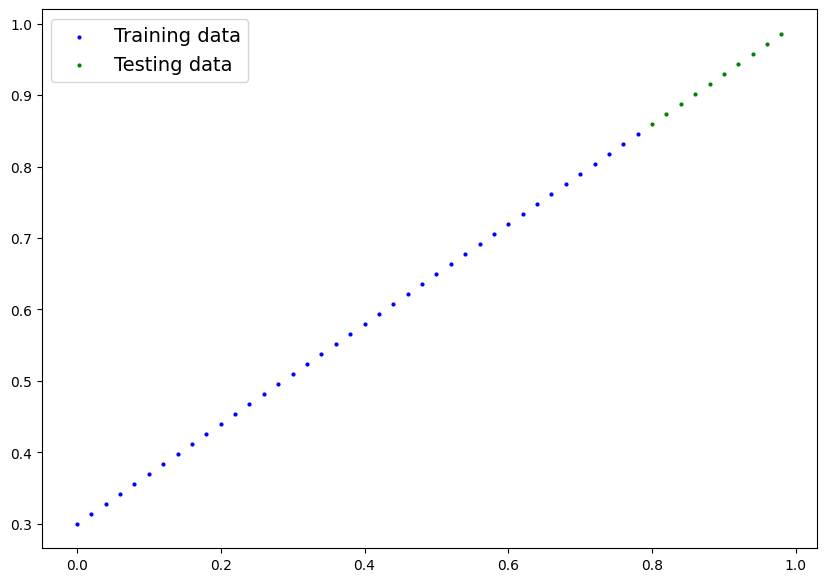

In [39]:
plot_predictions()

In [5]:
# Create a linear regression model class

class LinearRegressionModel(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = torch.nn.Parameter(torch.randn(1,
                                                      dtype=torch.float,
                                                      requires_grad=True))
        self.bias = torch.nn.Parameter(torch.randn(1,
                                                   dtype=torch.float,
                                                   requires_grad=True))
        
    def forward(self, x: torch.Tensor):
        return self.weights * x + self.bias


In [ ]:
torch.manual_seed(42)

model_0 = LinearRegressionModel()

# check out the parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [9]:
# get the parameter names
(model_0.state_dict())

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [ ]:
# make predictions with model
# torch.inference_mode() makes the code run faster than torch.no_grad()
with torch.inference_mode():
    y_preds = model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [15]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

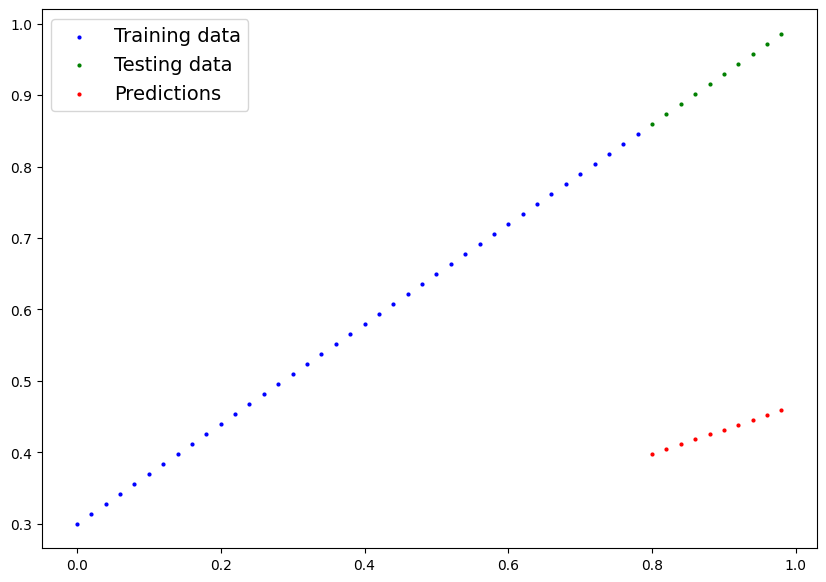

In [17]:
plot_predictions(predictions=y_preds)

Loss function is also known as cost functions or criterion
<br>
Loss function: A function to measure how wrong your model's prediction are to the ideal outputs, lower is better
Optimizer: Takes into account the loss of a model and adjusts the model's parameters (in our case, the weights and bias) to improve the loss function

Specifically for PyTorch, we need
- A training loop
- A testing loop

In [18]:
list(model_0.parameters())
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [ ]:
# set up a loss function
loss_fn = torch.nn.L1Loss()

#set up an optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(), lr = 0.01)

### Building a Multiclass Classification Model

- there is an upper limit on how many hidden layers you'd want
- nn.Sequential allows you to create a simple model that pushes data through layers sequentially
- Multiclassification utilizes Cross Entropy and softmax instead of BCE and sigmoid


In [8]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [4]:
import torch

class randTrainingData():
    def __init__(self, classtype: str, samples=1000, outputs=2, class_amount=4, multiplier=100):
        """ For creating training data to be used to test PyTorch models 

        Args:
            classtype (str): define which type of classfication data you want to return (binary, multiclass, etc.)
            samples (int): define how many data samples you want to return
            outputs (int): define how many outputs per sample to return
            class_amount (int): define how many classes you are classifying, only required for multiclass classifications. Sample amount must be divisible by class_amount
            multiplier (int): used to increase the range of the samples returned

        Returns:
            samples, labels

        Examples:
            binary = randTrainingData("binary")
            data, labels = binary.training_data()
        """
        match classtype:
            case "binary":
                self.features = torch.rand(samples, 2) * multiplier
                self.labels = (self.features[:, 1] > (0.5 * multiplier)) * 1
            case "multiclass":
                if samples % class_amount > 0: 
                    raise Exception(f"{samples} samples cannot be evenly split between {class_amount} classes")
                self.labels = torch.empty(samples)
                self.features = torch.empty(samples, outputs)
                section = int(samples / class_amount)
                current_class = 0
                for epoch in range(0, samples, section):
                    self.labels[epoch:(epoch+section)] = (torch.ones(section)) * current_class

                    # determine the center coord of our random multiclass data
                    center_x = torch.randint(low= 0,
                                           high= multiplier,
                                           size= (1,))
                    center_y = torch.randint(low= 0,
                                           high= multiplier,
                                           size= (1,))
                    center = torch.tensor([center_x, center_y])

                    # determine the spread of data around our center
                    self.features[epoch:(epoch+section), :] = (torch.randn(section, outputs) * class_amount) + center
                    current_class += 1


    def training_data(self):
        """ Returns the data and labels
        """ 
        return self.features, self.labels




In [6]:
class MulticlassModel(torch.nn.Module):
    def __init__(self, input_features, output_features, hidden_units=8):
        super().__init__()
        """Initializes multi-class classfication model.

        Args:
            input_features (int): Number of input features to the model
            output_features (int): Number of output features (number of output classes)
            hidden_units (int): Number of hidden units between layers, default 8 layers

        Returns:

        Example:
        """

        self.linear_layer_stack = torch.nn.Sequential(
            torch.nn.Linear(in_features=input_features, out_features=hidden_units),
            torch.nn.ReLU(),
            torch.nn.Linear(in_features=hidden_units, out_features=hidden_units),
            torch.nn.ReLU(),
            torch.nn.Linear(in_features=hidden_units, out_features=output_features),
        )

    def forward(self, x):
        return self.linear_layer_stack(x)


In [9]:
model_4 = MulticlassModel(input_features=2,
                          output_features=4,
                          hidden_units=8).to(device)

In [10]:
loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_4.parameters(),
                            lr=0.1)

In order to evaluate and train and test our model, we need to convert our model's outputs (logits) to prediction probabiities and then to prediction labels.

Logits -> probabilities -> labels

In [12]:
torch.manual_seed(17)
multiclass = randTrainingData("multiclass")
multiclass.training_data()
data, labels = multiclass.training_data()

raw_data = torch.hstack((data, labels.unsqueeze(1)))

print(raw_data)

section = 250

x = torch.arange(0, 100)

plt.scatter(data[:section, 0], data[:section, 1], c='g')
plt.scatter(data[section:section*2, 0], data[section:section*2, 1], c='r')
plt.scatter(data[section*2:section*3, 0], data[section*2:section*3, 1], c = 'b')
plt.scatter(data[section*3:, 0], data[section*3:, 1], c = 'y')
plt.show()


tensor([[66.4649, 83.6259,  0.0000],
        [59.2702, 86.7925,  0.0000],
        [56.6056, 86.0059,  0.0000],
        ...,
        [40.4361, 80.5036,  3.0000],
        [38.8751, 78.1944,  3.0000],
        [42.2048, 74.3592,  3.0000]])


RuntimeError: mat1 and mat2 must have the same dtype, but got Long and Float

In [ ]:
import torch.nn as nn
HIDDEN_UNITS = 100


class Multiclass_model(nn.Module):
    def __init__(self, input):
        super().__init__()
        self.sequence = nn.Sequential(
            nn.Linear(in_features=input, out_features=HIDDEN_UNITS),
            nn.ReLU(),
            nn.Linear(HIDDEN_UNITS, HIDDEN_UNITS),
            nn.ReLU(),
            nn.Linear(HIDDEN_UNITS, HIDDEN_UNITS),
            nn.ReLU(),
            nn.Linear(HIDDEN_UNITS, HIDDEN_UNITS),
            nn.ReLU(),
            nn.Linear(HIDDEN_UNITS, out_features=1),
            nn.Softmax(),
        )


## Image Recognition and CNN's

In [14]:
import torch
from torch import nn

import torchvision
from torchvision import transforms
from torchvision.transforms import ToTensor
from torchvision import datasets

import matplotlib.pyplot as plt


In [4]:
# setup training data
train_data = datasets.FashionMNIST(
    root="data",
    train=True, # train dataset
    download=True,
    transform=ToTensor(), # convert to tensor can also use torchvison.transforms.ToTensor()
    target_transform=None # how do we want to transform the labels/targets
)

# setup testing data
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
    target_transform=None
)



100.0%


Extracting data\FashionMNIST\raw\train-images-idx3-ubyte.gz to data\FashionMNIST\raw



100.0%


Extracting data\FashionMNIST\raw\train-labels-idx1-ubyte.gz to data\FashionMNIST\raw



100.0%


Extracting data\FashionMNIST\raw\t10k-images-idx3-ubyte.gz to data\FashionMNIST\raw



100.0%

Extracting data\FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to data\FashionMNIST\raw



In [10]:
image, label = train_data[0]

In [5]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [7]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [8]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [ ]:
# check the shape of our image
print(f"Image shape: {image.shape} -> [color_channels, height, width]") # greyscale images have 1 color channel, RGB images have 3 
print(f"Image label: {class_names[label]}")

Image shape: torch.Size([1, 28, 28]) -> [color_channels, height, width]
Image label: Ankle boot


Image shape: torch.Size([1, 28, 28])


Text(0.5, 1.0, '9')

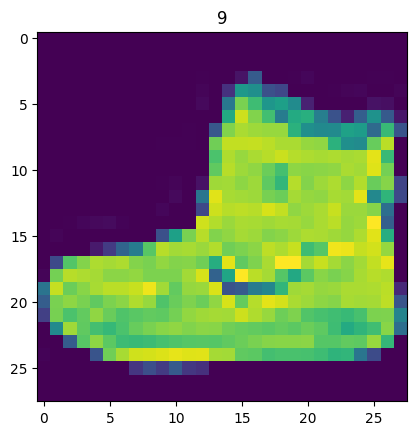

In [19]:
image, label = train_data[0]
print(f"Image shape: {image.shape}")
plt.imshow(image.squeeze()) # plt expects Height and Width or have color channels to be last, so we remove the color channel for greyscale images

plt.title(label)

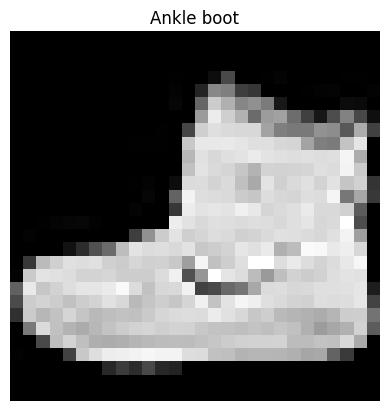

In [26]:
plt.imshow(image.squeeze(), cmap='gray')
plt.title(class_names[label]);
plt.axis(False);

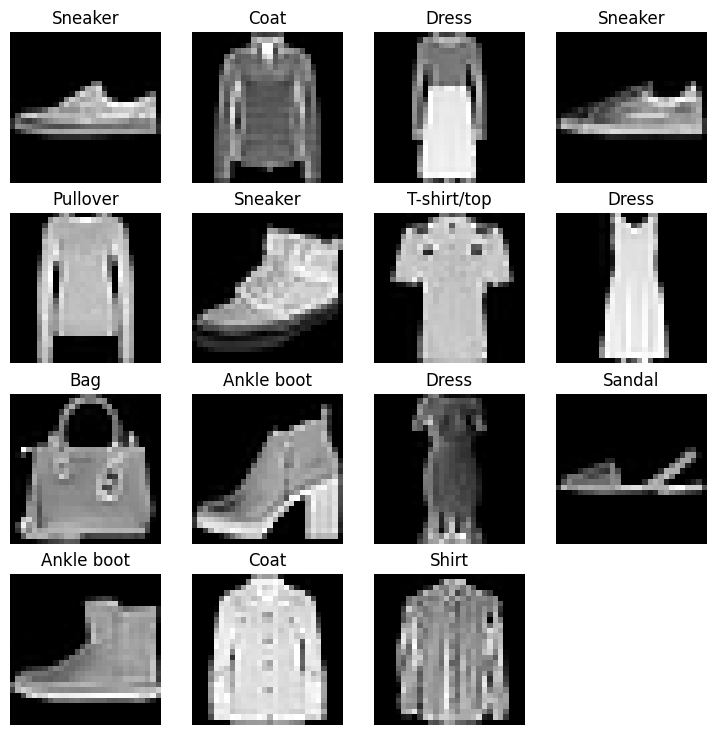

In [33]:
# plot more images
# torch.manual_seed(42)
fig = plt.figure(figsize=(9, 9))
rows, col = 4, 4
for i in range(1, rows*col):
    random_idx = torch.randint(0, len(train_data), size=[1]).item()
    img, label = train_data[random_idx]
    fig.add_subplot(rows, col, i)
    plt.imshow(img.squeeze(), cmap="gray")
    plt.title(class_names[label])
    plt.axis(False)

In [34]:
train_data, test_data

(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

Data is in the form of PyTorch Datasets.

DataLoader turns our dataset into a Python iterable.

We want to turn our data into batches (or mini-batches).
- Makes it easier to run as we only compute a sample (batch size = 32) instead of computing everything
- It gives our NN more chances to update its gradients per epoch

In [35]:
# use DataLoader
from torch.utils.data import DataLoader
BATCH_SIZE = 32

# Turn datasets into iterables (batches)
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             shuffle=False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x2cf509ea3c0>,
 <torch.utils.data.dataloader.DataLoader at 0x2cf509cccb0>)

In [ ]:
# here we look at X amount of batches, each containing 32 samples of the data
print(f"DataLoaders: {train_dataloader, test_dataloader}")
print(f"Length of train_dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}...")
print(f"Length of test_dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}...")

DataLoaders: (<torch.utils.data.dataloader.DataLoader object at 0x000002CF509EA3C0>, <torch.utils.data.dataloader.DataLoader object at 0x000002CF509CCCB0>)
Length of train_dataloader: 1875 batches of 32...
Length of test_dataloader: 313 batches of 32...


In [38]:
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image size: torch.Size([1, 28, 28])
Label: 6, label size: torch.Size([])


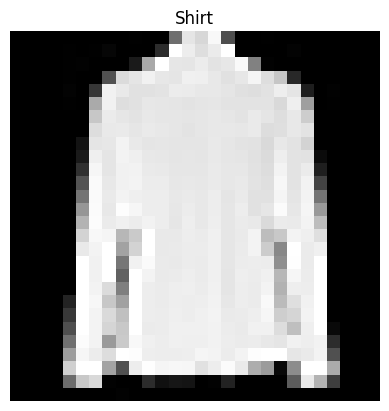

In [60]:
# show a sample
# torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False)
print(f"Image size: {img.shape}")
print(f"Label: {label}, label size: {label.shape}")